In [241]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from itertools import combinations
import random

In [242]:
tickers_1m = {
    "SOL_1m"  : "../Data/1m_Data/SOL_USDT_1m.csv",
    "ETH_1m"  : "../Data/1m_Data/ETH_USDT_1m.csv",
    "BTC_1m"  : "../Data/1m_Data/BTC_USDT_1m.csvv",
    "AVAX_1m" : "../Data/1m_Data/AVAX_USDT_1m.csv",
    "XRP_1m" : "../Data/1m_Data/XRP_USDT_1m.csv",
    "LTC_1m"   : "../Data/1m_Data/LTC_USDT_1m.csv",
    "DOGE_1m"  : "../Data/1m_Data/DOGE_USDT_1m.csv"
}

tickers_3m = {
    "SOL_3m"  : "../Data/3m_Data/SOL_USDT_3m.csv",
    "ETH_3m"  : "../Data/3m_Data/ETH_USDT_3m.csv",
    "BTC_3m"  : "../Data/3m_Data/BTC_USDT_3m.csv",
    "AVAX_3m" : "../Data/3m_Data/AVAX_USDT_3m.csv",
    "XRP_3m"  : "../Data/3m_Data/XRP_USDT_3m.csv",
    "LTC_3m"  : "../Data/3m_Data/LTC_USDT_3m.csv",
    "DOGE_3m" : "../Data/3m_Data/DOGE_USDT_3m.csv"
}

tickers_5m = {
    "SOL_5m"  : "../Data/5m_Data/SOL_USDT_5m.csv",
    "ETH_5m"  : "../Data/5m_Data/ETH_USDT_5m.csv",
    "BTC_5m"  : "../Data/5m_Data/BTC_USDT_5m.csv",
    "AVAX_5m" : "../Data/5m_Data/AVAX_USDT_5m.csv",
    "XRP_5m"  : "../Data/5m_Data/XRP_USDT_5m.csv",
    "LTC_5m"  : "../Data/5m_Data/LTC_USDT_5m.csv",
    "DOGE_5m" : "../Data/5m_Data/DOGE_USDT_5m.csv"
}


tickers_15m = {
    "SOL_15m"  : "../Data/15m_Data/SOL_USDT_15m.csv",
    "ETH_15m"  : "../Data/15m_Data/ETH_USDT_15m.csv",
    "BTC_15m"  : "../Data/15m_Data/BTC_USDT_15m.csv",
    "AVAX_15m" : "../Data/15m_Data/AVAX_USDT_15m.csv",
    "XRP_15m"  : "../Data/15m_Data/XRP_USDT_15m.csv",
    "LTC_15m"  : "../Data/15m_Data/LTC_USDT_15m.csv",
    "DOGE_15m" : "../Data/15m_Data/DOGE_USDT_15m.csv"
}


tickers_1h = {
    "SOL_1h"  : "../Data/1h_Data/SOL_USDT_1h.csv",
    "ETH_1h"  : "../Data/1h_Data/ETH_USDT_1h.csv",
    "BTC_1h"  : "../Data/1h_Data/BTC_USDT_1h.csv",
    "AVAX_1h" : "../Data/1h_Data/AVAX_USDT_1h.csv",
    "XRP_1h"  : "../Data/1h_Data/XRP_USDT_1h.csv",
    "LTC_1h"  : "../Data/1h_Data/LTC_USDT_1h.csv",
    "DOGE_1h" : "../Data/1h_Data/DOGE_USDT_1h.csv"
}


tickers_4h = {
    "SOL_4h"  : "../Data/4h_Data/SOL_USDT_4h.csv",
    "ETH_4h"  : "../Data/4h_Data/ETH_USDT_4h.csv",
    "BTC_4h"  : "../Data/4h_Data/BTC_USDT_4h.csv",
    "AVAX_4h" : "../Data/4h_Data/AVAX_USDT_4h.csv",
    "XRP_4h"  : "../Data/4h_Data/XRP_USDT_4h.csv",
    "LTC_4h"  : "../Data/4h_Data/LTC_USDT_4h.csv",
    "DOGE_4h" : "../Data/4h_Data/DOGE_USDT_4h.csv"
}


In [243]:
base_symbol = "LTC"
quote_symbol = "SOL"
timeframe = "1m"

ticker_map = {
    "1m": tickers_1m,
    "3m": tickers_3m,
    "5m": tickers_5m,
    "15m": tickers_15m,
    "1h" : tickers_1h,
    "4h" : tickers_4h
}

base_df = pd.read_csv(ticker_map[timeframe][f"{base_symbol}_{timeframe}"])
quote_df = pd.read_csv(ticker_map[timeframe][f"{quote_symbol}_{timeframe}"])

base_close = base_df['close']
quote_close = quote_df['close']

In [244]:

base_close_series = base_close
quote_close_series = quote_close

shared_timestamps = base_close_series.index.intersection(quote_close_series.index)

base_price_aligned = base_close_series.loc[shared_timestamps]
quote_price_aligned = quote_close_series.loc[shared_timestamps]


first_axis = base_price_aligned.to_numpy()
second_axis = quote_price_aligned.to_numpy()


/var/folders/c_/_ctxnkln1z76h710t7sk2rk40000gn/T/ipykernel_8900/2723351006.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


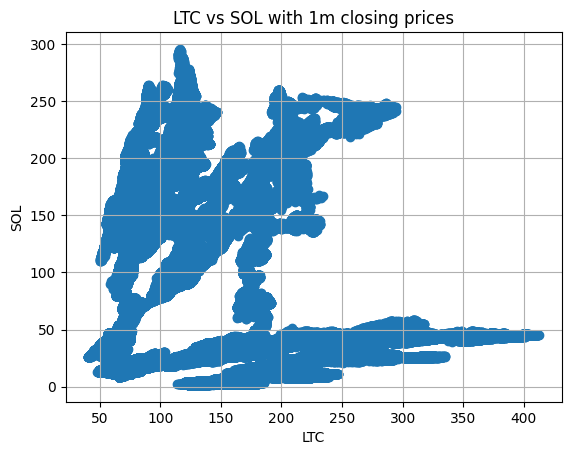

In [245]:
fig, ax = plt.subplots()
ax.scatter(first_axis,second_axis)
ax.set_xlabel(base_symbol)
ax.set_ylabel(quote_symbol)
ax.set_title(f"{base_symbol} vs {quote_symbol} with {timeframe} closing prices")
ax.grid(True)
fig.show()

<function matplotlib.pyplot.show(close=None, block=None)>

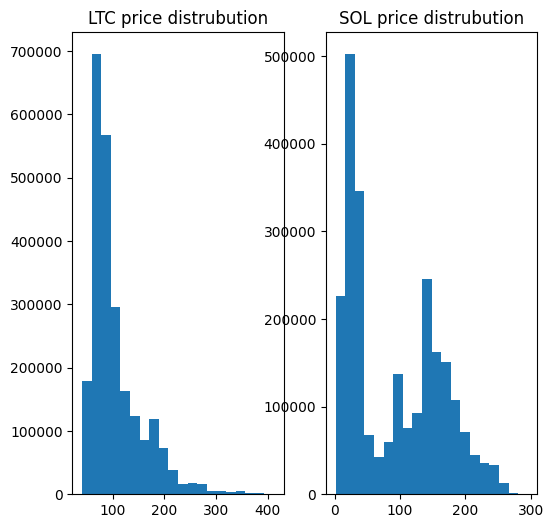

In [246]:
bins = 20

fig,(base_hist,quote_hist) = plt.subplots(nrows=1,ncols=2,figsize=(6,6))
base_hist.hist(first_axis,bins=bins)
base_hist.set_title(f"{base_symbol} price distrubution")

quote_hist.hist(second_axis,bins=bins)
quote_hist.set_title(f"{quote_symbol} price distrubution")

plt.show


In [247]:
price_matrix = np.column_stack(
    [first_axis,second_axis]
)
print(price_matrix.shape)

(2413600, 2)


In [248]:

price_centered_matrix = price_matrix - price_matrix.mean(axis=0)
print(price_centered_matrix.shape)

(2413600, 2)


In [249]:
covariance_matrix = np.cov(price_matrix,rowvar=False)
eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)

print(np.array2string(covariance_matrix, formatter={'float_kind':lambda x: "%.10f" % x}))

[[2635.9762641894 292.7167439952]
 [292.7167439952 4852.9109608627]]


In [250]:
U,Singular_Vals,V_Trans = np.linalg.svd(price_centered_matrix,full_matrices=False)

principal_vector_one = V_Trans[0]
principal_vector_two = V_Trans[1]

print(principal_vector_two)


[ 0.99167947 -0.12873164]


In [251]:
n = len(price_centered_matrix[:,0])

singular_vals_squared = [v**2 for v in Singular_Vals]

lambda_1 = singular_vals_squared[0] / (n-1)
lambda_2 = singular_vals_squared[1] / (n-1)

total_variance = lambda_1 + lambda_2
lambda_1_var = lambda_1/total_variance
lambda_2_var = lambda_2/total_variance

print(f"Total variance is {total_variance:.10f}")
print(f"lambda one explains {lambda_1_var * 100:.10f}%")
print(f"lambda two explains {lambda_2_var * 100:.10f}%")

Total variance is 7488.8872250517
lambda one explains 65.3088888041%
lambda two explains 34.6911111959%


In [252]:
residual_vector = price_centered_matrix @ principal_vector_two

print(residual_vector.shape)

(2413600,)


In [253]:
# bins = 50
# fig,(base_hist) = plt.subplots()
# base_hist.hist(residual_vector,bins=bins)
# base_hist.set_title("Residual Histogram")

# row_i = price_matrix[np.random.randint(price_matrix.shape[0])]
# mean_vector = price_matrix.mean(axis=0)
# residual_vector_std = residual_vector.std()
# residual_mean = residual_vector.mean()
# random_residual = (row_i - mean_vector) @ principal_vector_two
# z_score = (random_residual - residual_mean) / residual_vector_std

# base_hist.axvline(z_score,color='red',linestyle="--",label=f'Random z = {z_score:.10f}')
# base_hist.legend()

# spread = abs(row_i[0] - row_i[1])
# mean_spread = abs(mean_vector[0] - mean_vector[1])
# total_spread = abs(mean_spread - spread)

# lower_threshold = 0.3 
# upper_threshold = -0.3  

# if upper_threshold < z_score < lower_threshold:
#     print(f"The spread is {spread}")
#     print(f"The mean spread is {mean_spread}")
#     print(f"The total spread is {total_spread}")

In [254]:
print(base_df.columns)
print(quote_df.columns)


Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')
Index(['timestamp', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [255]:
base_df['timestamp'] = pd.to_datetime(base_df['timestamp'])
quote_df['timestamp'] = pd.to_datetime(quote_df['timestamp'])

base_df = base_df[['timestamp','close']].rename(columns={"close": "close_base_price"})
quote_df = quote_df[['timestamp','close']].rename(columns={"close":"close_quote_price"})

merged_df = pd.merge(base_df,quote_df,on='timestamp',how='inner')


In [256]:
spreads = (merged_df['close_base_price'].values - merged_df['close_quote_price'].values)

mean_spreads = pd.Series(spreads).rolling(window=100000, min_periods=25000).mean()
rolling_std   = pd.Series(spreads).rolling(window=100000, min_periods=25000).std().values

z_scores = (spreads - mean_spreads) / rolling_std

merged_df['spread'] = spreads
merged_df['mean_spreads'] = mean_spreads
merged_df['z_score'] = z_scores



In [257]:
merged_df.to_csv(f"../Data/Z_Score_data_{base_symbol}_{quote_symbol}_{timeframe}.csv",index=False)

print(merged_df.columns)

Index(['timestamp', 'close_base_price', 'close_quote_price', 'spread',
       'mean_spreads', 'z_score'],
      dtype='object')


0.16822737564603985
0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
              ...    
2413595    112.999039
2413596    112.878710
2413597    113.098381
2413598    113.118053
2413599    113.147724
Length: 2413600, dtype: float64


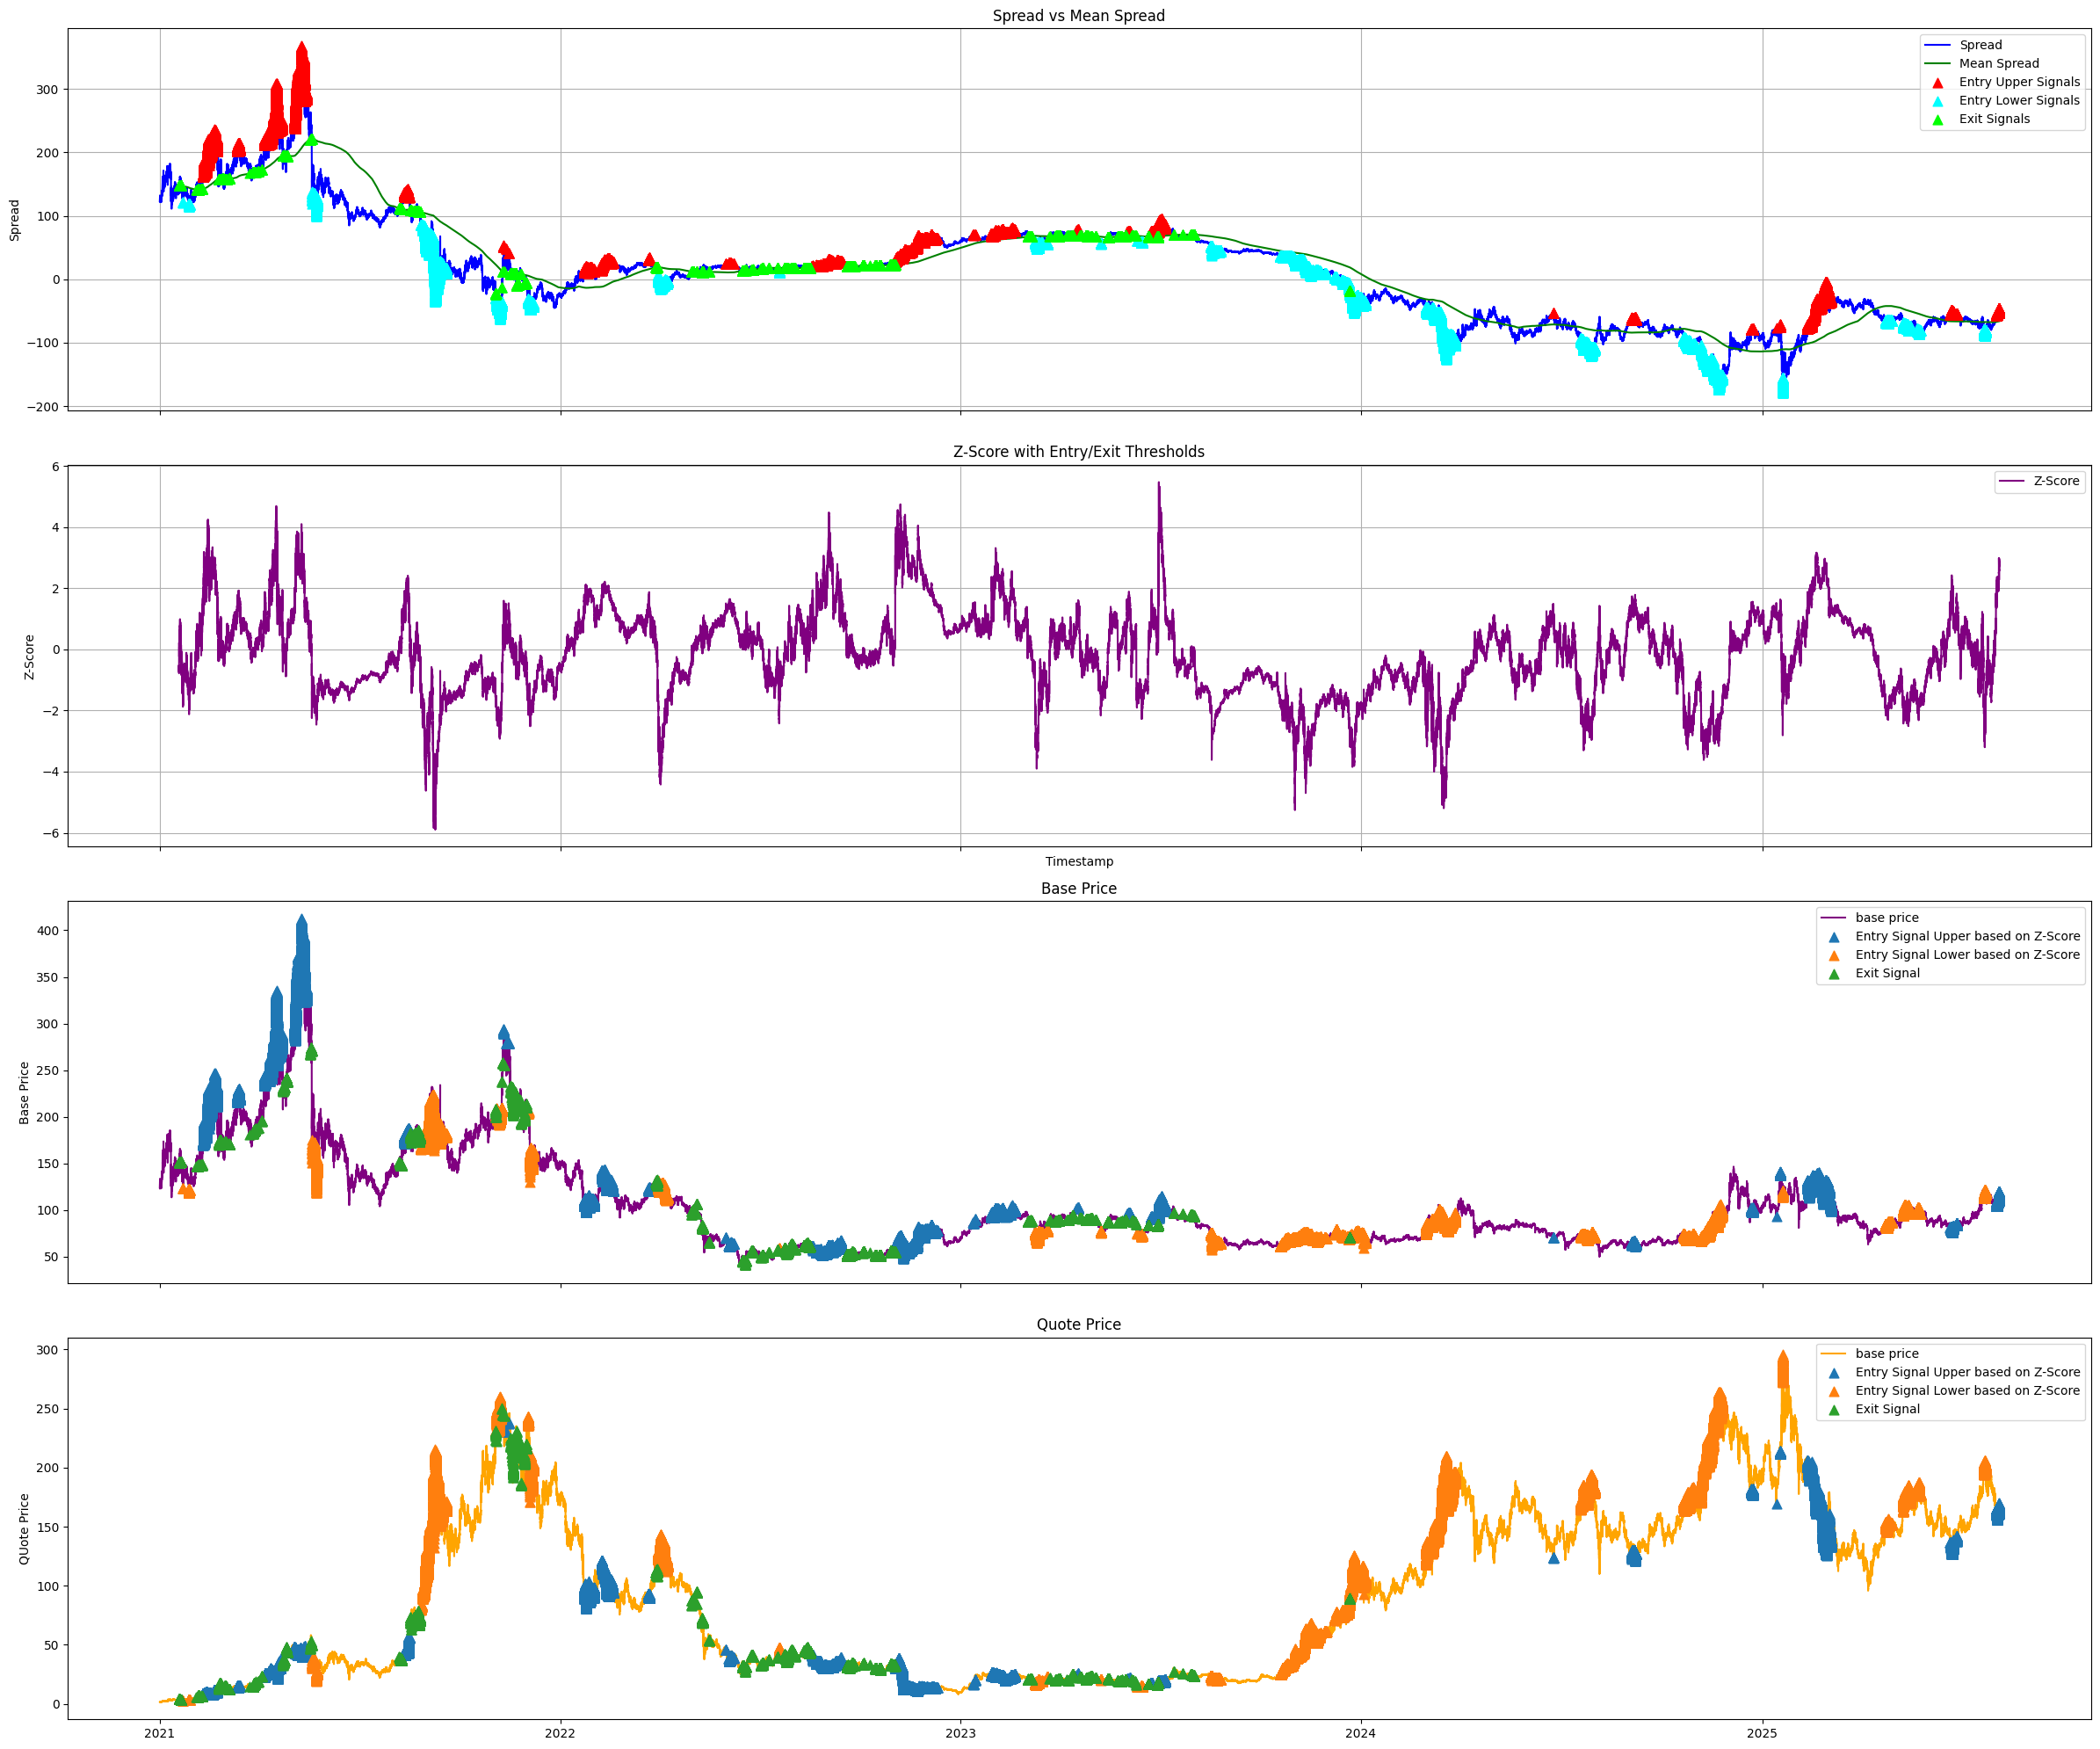

In [258]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(24, 20), sharex=True)

# ------------------------------
# Top Plot: Spread + Mean Spread
# ------------------------------
ax1.plot(merged_df['timestamp'], merged_df['spread'], label='Spread', color='blue')
ax1.plot(merged_df['timestamp'], merged_df['mean_spreads'], label='Mean Spread', color='green')
ax1.set_ylabel("Spread")
ax1.set_title("Spread vs Mean Spread")
ax1.legend()
ax1.grid(True)


# ------------------------------
# Price Plot: Base + Quote Price
# ------------------------------
ax3.plot(merged_df['timestamp'], merged_df['close_base_price'], label='base price', color='purple')
ax3.set_title("Base Price")
ax3.set_ylabel("Base Price")

ax4.plot(merged_df['timestamp'], merged_df['close_quote_price'], label='base price', color='orange')
ax4.set_title("Quote Price")
ax4.set_ylabel("QUote Price")


# ------------------------------
# Bottom Plot: Z-Score + Thresholds
# ------------------------------

ax2.plot(merged_df['timestamp'], merged_df['z_score'], label='Z-Score', color='purple')
ax2.set_ylabel("Z-Score")
ax2.set_title("Z-Score with Entry/Exit Thresholds")
ax2.legend()
ax2.grid(True)

# X-axis
ax2.set_xlabel("Timestamp")
plt.setp(ax2.get_xticklabels(), rotation=45)

# ------------------------------
# Plot: Entry Signals + Exit signals
# ------------------------------

z_scores = z_scores[~np.isnan(z_scores)]
z_scores = np.array(z_scores)
sorted_z_score = np.sort(z_scores)
perc_threshold = 0.10

sorted_z_score = np.sort(z_scores)  
threshold = int(len(sorted_z_score) * perc_threshold)  


upper_tail = sorted_z_score[-threshold:]  
lower_tail = sorted_z_score[:threshold] 



upper_bound = upper_tail.min()
lower_bound = lower_tail.max()


epsilon = .01 * mean_spreads.mean()

entry_upper = merged_df[merged_df['z_score'] > upper_bound]
entry_lower = merged_df[merged_df['z_score'] < lower_bound]


print(abs(epsilon))
print(abs(abs(merged_df['spread']) - merged_df['mean_spreads']))
exit_signals = merged_df[
    abs(abs(merged_df['spread']) - merged_df['mean_spreads']) < abs(epsilon)
]

ax1.scatter(entry_upper['timestamp'],entry_upper['spread'],color='red',marker="^",label='Entry Upper Signals', s=60, zorder=10)
ax1.scatter(entry_lower['timestamp'],entry_lower['spread'],color='cyan',marker="^",label='Entry Lower Signals', s=60, zorder=10)

ax1.scatter(exit_signals['timestamp'],exit_signals['spread'],color='lime',marker="^",label='Exit Signals', s=60, zorder=10)
ax1.legend()

ax3.scatter(entry_upper['timestamp'],entry_upper['close_base_price'],colorizer='green',marker="^",label='Entry Signal Upper based on Z-Score',s=60,zorder=10)
ax3.scatter(entry_lower['timestamp'],entry_lower['close_base_price'],colorizer='red',marker="^",label='Entry Signal Lower based on Z-Score',s=60,zorder=10)
ax3.scatter(exit_signals['timestamp'],exit_signals['close_base_price'],colorizer='Cyan',marker="^",label='Exit Signal',s=60,zorder=10)
ax3.legend()

ax4.scatter(entry_upper['timestamp'],entry_upper['close_quote_price'],colorizer='green',marker="^",label='Entry Signal Upper based on Z-Score',s=60,zorder=10)
ax4.scatter(entry_lower['timestamp'],entry_lower['close_quote_price'],colorizer='red',marker="^",label='Entry Signal Lower based on Z-Score',s=60,zorder=10)
ax4.scatter(exit_signals['timestamp'],exit_signals['close_quote_price'],colorizer='Cyan',marker="^",label='Exit Signal',s=60,zorder=10)
ax4.legend()




plt.tight_layout()
plt.show()


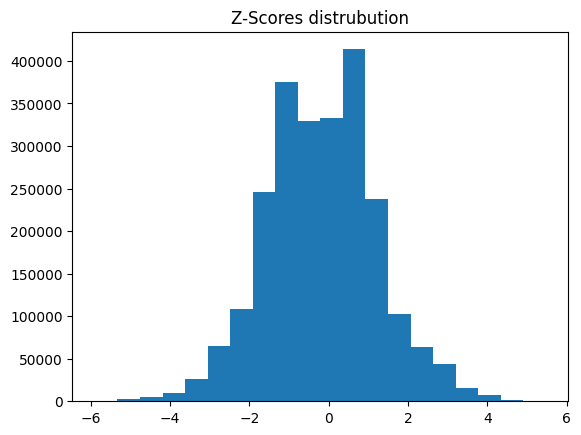

In [259]:
bins = 20

fig,(base_hist) = plt.subplots()
base_hist.hist(z_scores,bins=bins)
base_hist.set_title(f"Z-Scores distrubution")


plt.show()

In [260]:
entry_upper.to_csv(f"../Data/entry_upper{base_symbol}_{quote_symbol}_{timeframe}.csv",index=False)

In [261]:
entry_lower.to_csv(f"../Data/entry_lower{base_symbol}_{quote_symbol}_{timeframe}.csv",index=False)

In [262]:
z_score = exit_signals.to_csv(f"../Data/exit_signals{base_symbol}_{quote_symbol}_{timeframe}.csv",index=False)